In [1]:
#Cargamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leemos el dataset de entrenamiento
df = pd.read_csv("creditcardcsvpresent.csv")
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [3]:
#Eliminamos los espacios en blanco y slashes entre columnas para poder trabajar con ellas sin inconvenientes
df.rename(columns={'Marks': 'Roll_no', 
                   'Transaction date': 'Transaction_date',
                   'Average Amount/transaction/day': 'Average_Amount_transaction_day',
                   'Is declined': 'Is_declined',
                   'Total Number of declines/day': 'Total_Number_of_declines_day'}, inplace=True)

# Análisis exploratorio

In [4]:
#Evaluamos el estado general del dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction_date                0 non-null      float64
 2   Average_Amount_transaction_day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is_declined                     3075 non-null   object 
 5   Total_Number_of_declines_day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

La columna **Transaction date** esta completamente vacía, decidimos eliminarla ya que no aporta nada al conjunto de datos

In [5]:
#Eliminamos la columna Transaction date y creamos un nuevo dataframe para conservar el original
df_new = df.drop(["Transaction_date"], axis=1)
df_new.shape

(3075, 11)

Nos quedamos con un dataframe de 11 columnas y 3075 registros.

In [6]:
#Identificamos la cantidad y tipo de columnas que tenemos en el dataframe
df_new.dtypes.value_counts()

object     4
int64      4
float64    3
dtype: int64

In [7]:
df_new.head()

,Merchant_id,Average_Amount_transaction_day,Transaction_amount,Is_declined,Total_Number_of_declines_day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


## Análisis variables numéricas

In [8]:
#Obtenemos datos estadísticos de las variables numéricas
df_new.describe()

,Merchant_id,Average_Amount_transaction_day,Transaction_amount,Total_Number_of_declines_day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average_Amount_transaction_day'>

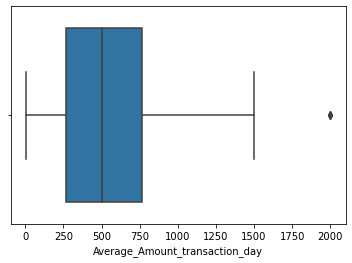

In [9]:
#Visualizamos la distribución de la columna Average_Amount/transaction/day	
sns.boxplot(df.Average_Amount_transaction_day)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transaction_amount'>

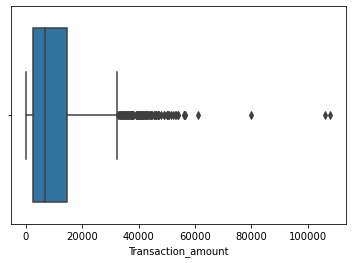

In [10]:
#Visualizamos la distribución de la columna Transaction_amount
sns.boxplot(df.Transaction_amount)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Number_of_declines_day', ylabel='count'>

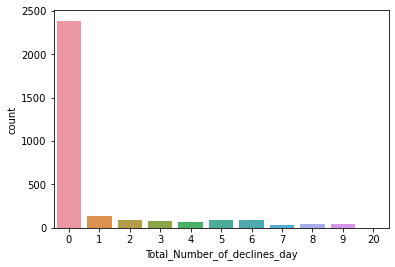

In [11]:
#Visualizamos la distribución de la columna Total_Number_of_declines_day
sns.countplot(df.Total_Number_of_declines_day)

<AxesSubplot:xlabel='Daily_chargeback_avg_amt', ylabel='Count'>

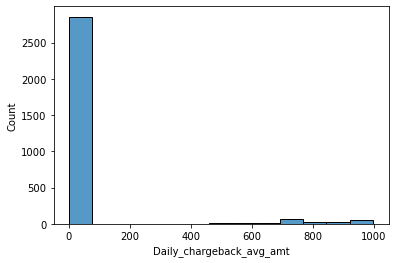

In [12]:
#Visualizamos la distribución de la columna Daily_chargeback_avg_amt
sns.histplot(df.Daily_chargeback_avg_amt)

<AxesSubplot:xlabel='6-month_chbk_freq', ylabel='Count'>

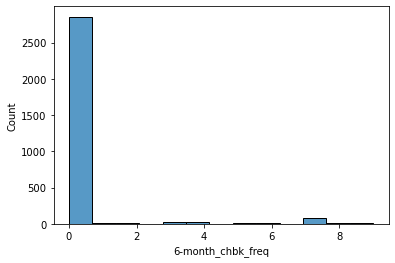

In [13]:
#Visualizamos la distribución de la columna Daily_chargeback_avg_amt
sns.histplot(data=df_new, x="6-month_chbk_freq")

## Análisis de variables categóricas

In [14]:
#Obtenemos las categorías de cada variable categórica y su frecuencia
df_ = df_new.select_dtypes(exclude=['int64', 'float64'])
for col in df_.columns:
    print(df_[col].unique())
    print(df_[col].value_counts())

['N' 'Y']
N    3018
Y      57
Name: Is_declined, dtype: int64
['Y' 'N']
N    2369
Y     706
Name: isForeignTransaction, dtype: int64
['Y' 'N']
N    2870
Y     205
Name: isHighRiskCountry, dtype: int64
['Y' 'N']
N    2627
Y     448
Name: isFradulent, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Is_declined', ylabel='count'>

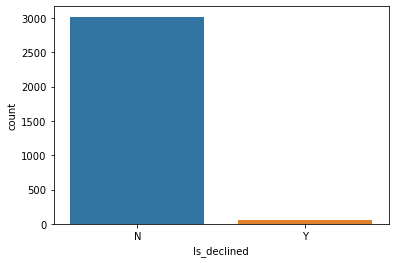

In [15]:
#Visualizamos la distribución de la columna Is_declined
sns.countplot(df.Is_declined)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isForeignTransaction', ylabel='count'>

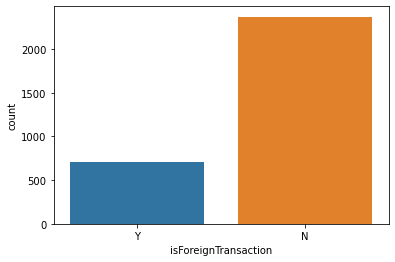

In [16]:
#Visualizamos la distribución de la columna isForeignTransaction
sns.countplot(df.isForeignTransaction)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isHighRiskCountry', ylabel='count'>

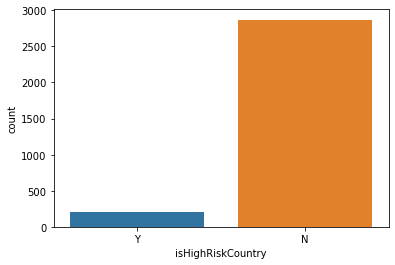

In [17]:
#Visualizamos la distribución de la columna isHighRiskCountry
sns.countplot(df.isHighRiskCountry)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFradulent', ylabel='count'>

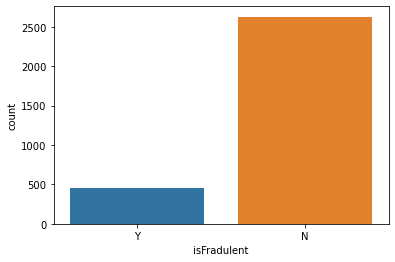

In [18]:
#Visualizamos la distribución de la columna isFradulent
sns.countplot(df.isFradulent)

## Análisis de correlación

<AxesSubplot:>

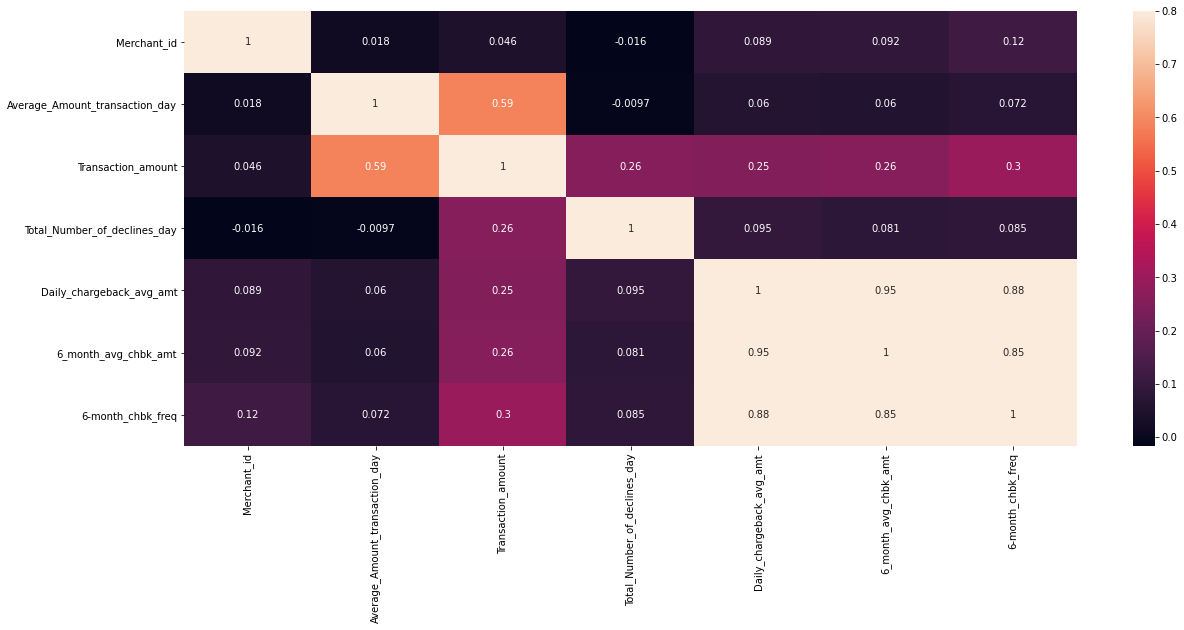

In [19]:
#Obtenemos la correlación existente entre cada una de las variables
correlacion = df_new.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlacion, vmax=.8, annot=True)

# Agrupamiento de datos

TEST K-MEANS

Consolidacion de datos 

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [21]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [22]:
from sklearn.preprocessing import LabelEncoder

df_categorias = df_new.select_dtypes(exclude=['int64','float64'])
df_categorias = df_categorias.drop(['isFradulent'], axis=1)
df_nums = df_new.select_dtypes(exclude=['object'])

In [23]:
df_consolidados = pd.concat([df_nums,df_categorias], axis=1)
df_consolidados.head()

,Merchant_id,Average_Amount_transaction_day,Transaction_amount,Total_Number_of_declines_day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,Is_declined,isForeignTransaction,isHighRiskCountry
0,3160040998,100.0,3000.0,5,0,0.0,0,N,Y,Y
1,3160040998,100.0,4300.0,5,0,0.0,0,N,Y,Y
2,3160041896,185.5,4823.0,5,0,0.0,0,Y,N,N
3,3160141996,185.5,5008.5,8,0,0.0,0,Y,N,N
4,3160241992,500.0,26000.0,0,800,677.2,6,N,Y,Y


In [24]:
df_consolidados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Average_Amount_transaction_day  3075 non-null   float64
 2   Transaction_amount              3075 non-null   float64
 3   Total_Number_of_declines_day    3075 non-null   int64  
 4   Daily_chargeback_avg_amt        3075 non-null   int64  
 5   6_month_avg_chbk_amt            3075 non-null   float64
 6   6-month_chbk_freq               3075 non-null   int64  
 7   Is_declined                     3075 non-null   object 
 8   isForeignTransaction            3075 non-null   object 
 9   isHighRiskCountry               3075 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 240.4+ KB


In [25]:
df_new_noetiqueta = df_new.drop(['isFradulent'], axis=1)
df_consolidados = df_consolidados[list(df_new_noetiqueta.columns.values)]
df_consolidados.head()
df_consolidados.info

<bound method DataFrame.info of       Merchant_id  Average_Amount_transaction_day  Transaction_amount  \
0      3160040998                           100.0              3000.0   
1      3160040998                           100.0              4300.0   
2      3160041896                           185.5              4823.0   
3      3160141996                           185.5              5008.5   
4      3160241992                           500.0             26000.0   
...           ...                             ...                 ...   
3070   6661273532                           500.0             11000.0   
3071   6661273532                           800.0                 0.0   
3072   6661273533                           800.0             20800.0   
3073   6661273532                          1500.0             12000.0   
3074   6661273533                          1500.0             36000.0   

     Is_declined  Total_Number_of_declines_day isForeignTransaction  \
0              N    

In [26]:
df_consolidados = MultiColumnLabelEncoder(columns = ['Is_declined',
 'isForeignTransaction',
 'isHighRiskCountry',]).fit_transform(df_consolidados)
df_consolidados.head()

,Merchant_id,Average_Amount_transaction_day,Transaction_amount,Is_declined,Total_Number_of_declines_day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0
2,3160041896,185.5,4823.0,1,5,0,0,0,0.0,0
3,3160141996,185.5,5008.5,1,8,0,0,0,0.0,0
4,3160241992,500.0,26000.0,0,0,1,1,800,677.2,6


In [27]:
df_consolidados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Average_Amount_transaction_day  3075 non-null   float64
 2   Transaction_amount              3075 non-null   float64
 3   Is_declined                     3075 non-null   int32  
 4   Total_Number_of_declines_day    3075 non-null   int64  
 5   isForeignTransaction            3075 non-null   int32  
 6   isHighRiskCountry               3075 non-null   int32  
 7   Daily_chargeback_avg_amt        3075 non-null   int64  
 8   6_month_avg_chbk_amt            3075 non-null   float64
 9   6-month_chbk_freq               3075 non-null   int64  
dtypes: float64(3), int32(3), int64(4)
memory usage: 204.3 KB


<AxesSubplot:>

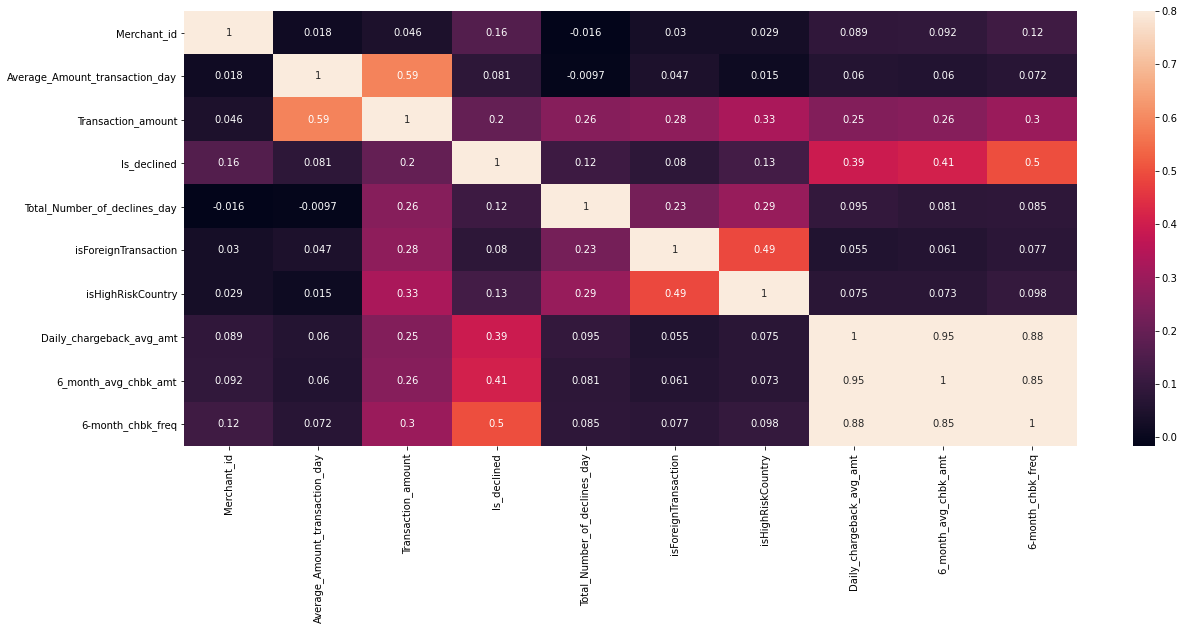

In [28]:
correlacion2 = df_consolidados.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlacion2, vmax=.8, annot=True)

# K-MEAN con Revisión por Coeficiente de Silueta

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_consolidados)

In [30]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [31]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for i in range(2,11):
    km = KMeans(n_clusters = i, random_state=42)
    km.fit_predict(df_consolidados)
    score = silhouette_score(df_consolidados, km.labels_, metric='euclidean')
    print('Número de clusters ',i,'Silhouette Score: %.3f' % score)
    silhouette_coefficients.append(score)

Número de clusters  2 Silhouette Score: 0.629
Número de clusters  3 Silhouette Score: 0.593
Número de clusters  4 Silhouette Score: 0.565
Número de clusters  5 Silhouette Score: 0.558
Número de clusters  6 Silhouette Score: 0.557
Número de clusters  7 Silhouette Score: 0.560
Número de clusters  8 Silhouette Score: 0.555
Número de clusters  9 Silhouette Score: 0.552
Número de clusters  10 Silhouette Score: 0.545


<function matplotlib.pyplot.show(close=None, block=None)>

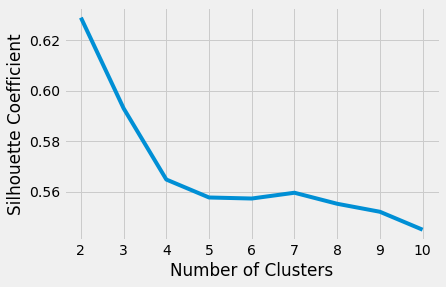

In [32]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show

Cantidad de Clústers óptima = 2

IRIS DATASET

In [ ]:
from sklearn import datasets
from sklearn